In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean
import matplotlib
%matplotlib inline

In [2]:
multi_dataDIR = '/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Vbottomdegrad.nc'
AZE=xr.open_mfdataset(multi_dataDIR,concat_dim='t', combine='nested')
AZE

<xarray.Dataset>
Dimensions:            (t: 12, y: 1182, x: 1480)
Dimensions without coordinates: t, y, x
Data variables:
    degraded_vomecrty  (t, y, x) float32 dask.array<chunksize=(1, 1182, 1480), meta=np.ndarray>

In [5]:
umean = AZE.degraded_vomecrty.mean(dim='t')
umean

<xarray.DataArray 'degraded_vomecrty' (y: 1182, x: 1480)>
dask.array<mean_agg-aggregate, shape=(1182, 1480), dtype=float32, chunksize=(1182, 1480), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [11]:
dirf='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Vbottomdegrad.nc'
ds=xr.open_dataset(dirf,decode_times=False)
ds

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:03 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [21]:
nav_lat =ds.nav_lat
nav_lon=ds.nav_lon

In [16]:
umean.shape

(1182, 1480)

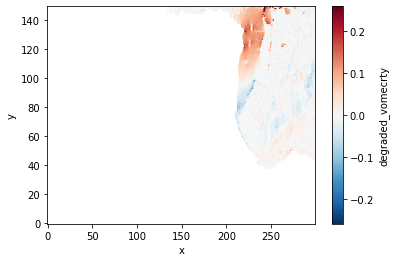

In [18]:
umean[0:150,0:300].plot()

In [23]:
nav_lon.values

array([[-97.84167  , -97.775    , -97.708336 , ...,   0.625    ,
          0.6916666,   0.7583333],
       [-97.84167  , -97.775    , -97.708336 , ...,   0.625    ,
          0.6916666,   0.7583333],
       [-97.84167  , -97.775    , -97.708336 , ...,   0.625    ,
          0.6916666,   0.7583333],
       ...,
       [-99.623726 , -99.56996  , -99.5162   , ...,   8.4034605,
          8.481724 ,   8.559932 ],
       [-99.62991  , -99.57619  , -99.52248  , ...,   8.432922 ,
          8.511225 ,   8.589472 ],
       [-99.63611  , -99.58244  , -99.52876  , ...,   8.462477 ,
          8.540819 ,   8.619106 ]], dtype=float32)

In [68]:
lonmin=-70
lonmax=-50
latmin=30
latmax=40
domain = (lonmin<nav_lon) * (nav_lon<lonmax) * (latmin<nav_lat) * (nav_lat<latmax)
where = np.where(domain)

In [69]:
imin=where[0].min()
imax=where[0].max()
jmin=where[1].min()
jmax=where[1].max()

In [70]:
print(imin,imax,jmin,jmax)

377 569 418 719


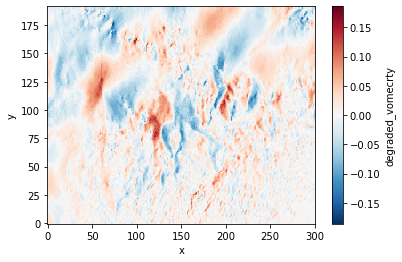

In [71]:
umean[imin:imax,jmin:jmax].plot()

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_25552/1081303460.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Zoom_Moy_v_Vbottom_annee.png', bbbox_inches='tight')


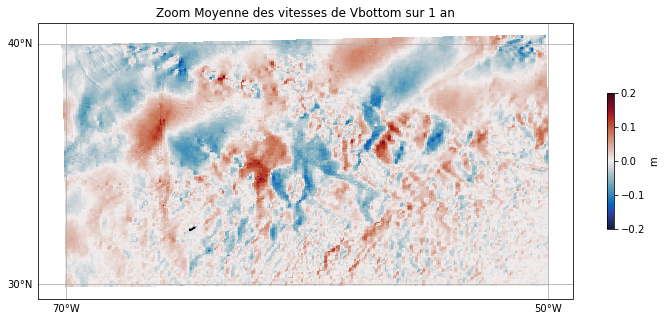

In [72]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(nav_lon[imin:imax,jmin:jmax],nav_lat[imin:imax,jmin:jmax],umean[imin:imax,jmin:jmax],transform=ccrs.PlateCarree(),cmap=cmocean.cm.balance,vmin=-0.2,vmax=0.2)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Zoom Moyenne des vitesses de Vbottom sur 1 an')
plt.savefig('Zoom_Moy_v_Vbottom_annee.png', bbbox_inches='tight')


In [73]:
E=umean*umean

In [74]:
E.shape

(1182, 1480)

In [75]:
Ezoom=E[imin:imax,jmin:jmax]
Ezoom.shape

(192, 301)

/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/roussilh/miniconda3/envs/jupyter/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/tmp/ipykernel_25552/1645901094.py:22: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Zoom_Moy_v_Vbottom_annee.png', bbbox_inches='tight')


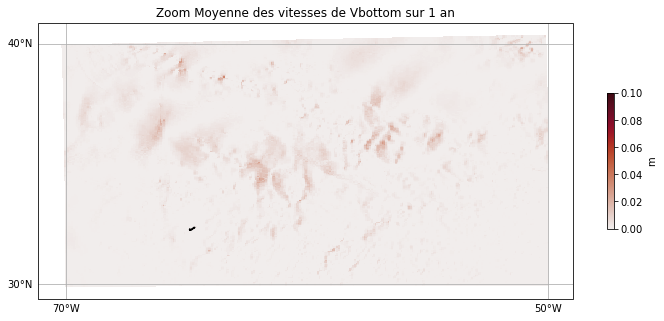

In [87]:
# import cartopy.feature as cfeature
fig = plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.PlateCarree())
pcolor=ax.pcolormesh(nav_lon[imin:imax,jmin:jmax],nav_lat[imin:imax,jmin:jmax],E[imin:imax,jmin:jmax],transform=ccrs.PlateCarree(),cmap=cmocean.cm.amp,vmin=0,vmax=0.1)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
grid_lines.xlocator = mticker.FixedLocator(np.arange(-90,10,20))
grid_lines.ylocator = mticker.FixedLocator(np.arange(0,70,10))
grid_lines.ylabels_right = False
grid_lines.xlabels_top = False


ax.add_feature(cfeature.COASTLINE)


cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.25,label='m')

plt.title('Zoom Moyenne des vitesses de Vbottom sur 1 an')
plt.savefig('Zoom_Moy_v_Vbottom_annee.png', bbbox_inches='tight')


In [50]:
Ezoom

<xarray.DataArray 'degraded_vomecrty' (y: 215, x: 298)>
dask.array<getitem, shape=(215, 298), dtype=float32, chunksize=(215, 298), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [77]:
m=Ezoom.mean(dim={'x','y'})
m

<xarray.DataArray 'degraded_vomecrty' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [78]:
print(m.values)

0.0011413144


In [6]:
multi_dataDIR2 = '/bettik/roussilh/noMED-degrad/mean/eNATL60noMED-BLBT02_y*.1m_Ubottomdegrad.nc'
AZR=xr.open_mfdataset(multi_dataDIR2,concat_dim='t', combine='nested')
AZR

<xarray.Dataset>
Dimensions:            (t: 12, y: 1181, x: 1480)
Dimensions without coordinates: t, y, x
Data variables:
    degraded_vozocrtx  (t, y, x) float32 dask.array<chunksize=(1, 1181, 1480), meta=np.ndarray>

In [7]:
umean2 = AZR.degraded_vozocrtx.mean(dim='t')
umean2

<xarray.DataArray 'degraded_vozocrtx' (y: 1181, x: 1480)>
dask.array<mean_agg-aggregate, shape=(1181, 1480), dtype=float32, chunksize=(1181, 1480), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [55]:
dirf1='/bettik/roussilh/noMED-degrad/eNATL60noMED-BLBT02_y2009m07d01.1h_Ubottomdegrad.nc'
ls=xr.open_dataset(dirf,decode_times=False)
ls

<xarray.Dataset>
Dimensions:            (time_counter: 24, y: 1182, x: 1480, depthv: 1)
Coordinates:
  * depthv             (depthv) float32 0.4805
  * time_counter       (time_counter) float64 3.455e+09 3.455e+09 ... 3.455e+09
Dimensions without coordinates: y, x
Data variables:
    degraded_vomecrty  (time_counter, y, x) float32 ...
    nav_lat            (y, x) float32 ...
    nav_lon            (y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Mon May  9 15:14:03 2022: ncks -O -x -v flsdc test_eNA...
    NCO:               netCDF Operators version 4.7.4-alpha04 (http://nco.sf....

In [56]:
nav_lat =ds.nav_lat
nav_lon=ds.nav_lon

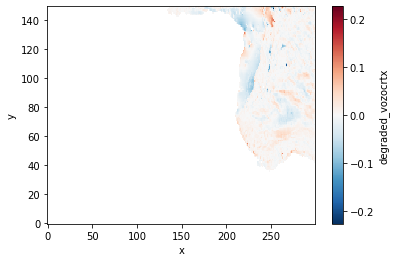

In [57]:
umean2[0:150,0:300].plot()

In [79]:
lonmin=-70
lonmax=-50
latmin=30
latmax=40
domain = (lonmin<nav_lon) * (nav_lon<lonmax) * (latmin<nav_lat) * (nav_lat<latmax)
where = np.where(domain)


In [80]:
imin=where[0].min()
imax=where[0].max()
jmin=where[1].min()
jmax=where[1].max()

In [81]:
print(imin,imax,jmin,jmax)

377 569 418 719


In [82]:
E2=umean2*umean2

In [83]:
Ezoom2=E2[imin:imax,jmin:jmax]
Ezoom2.shape

(192, 301)

In [84]:
m2=Ezoom2.mean(dim={'x','y'})
m2

<xarray.DataArray 'degraded_vozocrtx' ()>
dask.array<mean_agg-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

In [85]:
print(m2.values)

0.0014293424


In [86]:
Ec=1/2*(m2+m)
print(Ec.values)

0.0012853284
